In [10]:
#import required libraries
import csv
import pandas as pd
import glob
import os
import math
import matplotlib.pyplot as plt
import decimal
from decimal import Decimal
import numpy as np
from IPython.display import clear_output
import time

from readers import read_tc_data
from efficiency import calculate_temperature_rise, calculate_rms_error

## Set the working path

In [7]:
# General working path
working_path = r'C:\Users\maria\OneDrive - The University of Manchester\code\matsci-tools\establishing_an_automated_heat_source_calibration_framework'

# Efficiency test subpath
subpath = 'tc_input'


## Load experimental TC data

In [3]:
file_path = os.path.join(working_path, subpath, 'experiment')
exp_data_temp = read_tc_data(file_path)

## Load simulation TC data

In [4]:
file_path = os.path.join(working_path, subpath, 'simulation')
sim_data_temp = read_tc_data(file_path)

efficiencies = []
for sim_d in sim_data_temp:
    efficiencies.append(
        float(sim_d['file'][-8:-4])
    )

## Calculate temperature rise

In [5]:
exp_data_temp_rise = calculate_temperature_rise(exp_data_temp)
sim_data_temp_rise = calculate_temperature_rise(sim_data_temp)

## Calculate RMS error


In [6]:
# USER INPUT:
# Choose thermocouple data to be included in the analysis:
tc_names = ['TC5', 'TC7', 'TC8', 'TC12']

Text(0, 0.5, 'RMSE')

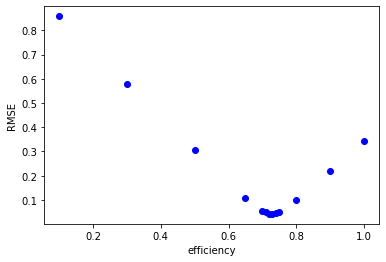

In [8]:
RMS_list = calculate_rms_error(exp_data_temp, sim_data_temp, tc_names=tc_names)

plt.plot(efficiencies, RMS_list,'bo')
plt.xlabel('efficiency')
plt.ylabel('RMSE')

In [9]:
min_RMS = min(RMS_list)
min_index = RMS_list.index(min_RMS)
efficiencies[min_index]

0.73